#Answering Problem related question section

**Define the problem.**


our main problem is predicting the product ratings of Wish.com 


**What is the input?**


The input is the features of the products like price and so on 

**What is the output?**

The output is rating classes from 1 to 5 for the product



**What data mining function is required?**



classification

**What could be the challenges?**



Data could be dirty,
features could be more than samples,
hyperparameter tunning,
feature selection

**What is the impact?**




meeting customer requirements, increasing customers , gain insights on products

**What is an ideal solution?**

 


ideal solution is to first investigate the data well, clean it and understand it
then start try different classification models that can fit it, and choose the optimal one for further deployment 


#Code Section

Mounting data from drive

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


Importing essential libraries

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

Reading data

In [3]:
data = pd.read_csv("/content/gdrive/MyDrive/data_mining/comp_1/train_new.csv")

Investigating the data 

In [4]:
data.shape

(1094, 34)

In [5]:
data.head()

,price,retail_price,currency_buyer,units_sold,uses_ad_boosts,rating,rating_count,badges_count,badge_local_product,badge_product_quality,...,merchant_name,merchant_info_subtitle,merchant_rating_count,merchant_rating,merchant_id,merchant_has_profile_picture,merchant_profile_picture,theme,crawl_month,id
0,8.00,7,EUR,10000,1,4.0,1670,0,0,0,...,keepahorse,"88 % avis positifs (66,644 notes)",66644,4.137582,577fb2b368116418674befd9,1,https://s3-us-west-1.amazonaws.com/sweeper-pro...,summer,2020-08,272
1,8.00,7,EUR,1000,0,4.0,843,1,1,0,...,上海铭启电气科技有限公司,"91 % avis positifs (25,752 notes)",25752,4.256873,566a3ef17233ff2686443082,0,NaN,summer,2020-08,1515
2,6.00,34,EUR,100,0,4.0,10,0,0,0,...,zhaodongmei,"83 % avis positifs (3,897 notes)",3897,3.928920,5aacd6c1ccf0c83e5a6f3de0,0,NaN,summer,2020-08,940
3,4.67,4,EUR,100,1,3.0,82,0,0,0,...,pookie0331,"87 % avis positifs (7,497 notes)",7497,4.079365,583141fbfef4094e51453d9b,0,NaN,summer,2020-08,309
4,8.00,11,EUR,1000,0,4.0,127,0,0,0,...,shitongyi12683626,91 % avis positifs (173 notes),173,4.306358,5d3bc9f8e13a7e654424a4cb,0,NaN,summer,2020-08,226


In [6]:
data.columns

Index(['price', 'retail_price', 'currency_buyer', 'units_sold',
       'uses_ad_boosts', 'rating', 'rating_count', 'badges_count',
       'badge_local_product', 'badge_product_quality', 'badge_fast_shipping',
       'tags', 'product_color', 'product_variation_size_id',
       'product_variation_inventory', 'shipping_option_name',
       'shipping_option_price', 'shipping_is_express', 'countries_shipped_to',
       'inventory_total', 'has_urgency_banner', 'urgency_text',
       'origin_country', 'merchant_title', 'merchant_name',
       'merchant_info_subtitle', 'merchant_rating_count', 'merchant_rating',
       'merchant_id', 'merchant_has_profile_picture',
       'merchant_profile_picture', 'theme', 'crawl_month', 'id'],
      dtype='object')

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1094 entries, 0 to 1093
Data columns (total 34 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   price                         1094 non-null   float64
 1   retail_price                  1094 non-null   int64  
 2   currency_buyer                1094 non-null   object 
 3   units_sold                    1094 non-null   int64  
 4   uses_ad_boosts                1094 non-null   int64  
 5   rating                        1094 non-null   float64
 6   rating_count                  1094 non-null   int64  
 7   badges_count                  1094 non-null   int64  
 8   badge_local_product           1094 non-null   int64  
 9   badge_product_quality         1094 non-null   int64  
 10  badge_fast_shipping           1094 non-null   int64  
 11  tags                          1094 non-null   object 
 12  product_color                 1065 non-null   object 
 13  pro

Checking features 

In [8]:
data['currency_buyer'].value_counts()

EUR    1094
Name: currency_buyer, dtype: int64

In [9]:
#it seems that this column contains only one value so it will not affect the learning and will be useless for me so i will drop it
data.drop('currency_buyer',axis=1,inplace=True)

In [10]:
data['urgency_text'].value_counts()

Quantité limitée !                  348
Réduction sur les achats en gros      1
Name: urgency_text, dtype: int64

In [11]:
data['urgency_text'].isnull().sum()

745

In [12]:
# seems to be the same problem as the previous column, in addition to alot of null values , so it will be dropped

In [13]:
data.drop('urgency_text',axis=1,inplace=True)

# **Check for nulls**

In [14]:
nan_count = data.isna().sum()
nan_count

price                             0
retail_price                      0
units_sold                        0
uses_ad_boosts                    0
rating                            0
rating_count                      0
badges_count                      0
badge_local_product               0
badge_product_quality             0
badge_fast_shipping               0
tags                              0
product_color                    29
product_variation_size_id        12
product_variation_inventory       0
shipping_option_name              0
shipping_option_price             0
shipping_is_express               0
countries_shipped_to              0
inventory_total                   0
has_urgency_banner              745
origin_country                   12
merchant_title                    0
merchant_name                     4
merchant_info_subtitle            0
merchant_rating_count             0
merchant_rating                   0
merchant_id                       0
merchant_has_profile_picture

In [15]:
# seems to have alot of missing values that is difficult to be handled
data.drop('has_urgency_banner',axis=1,inplace=True)

In [16]:
# seems also to have alot of missing values that is difficult to be handled
data.drop('merchant_profile_picture',axis=1,inplace=True)

In [17]:
data['crawl_month'].value_counts()

2020-08    1094
Name: crawl_month, dtype: int64

In [18]:
# months have no different values
data.drop('crawl_month',axis=1,inplace=True)

# **handeling Nans**

In [19]:
data['product_color'].value_counts()

black             219
white             173
blue               77
yellow             69
pink               68
                 ... 
claret              1
brown & yellow      1
whitestripe         1
Pink                1
light green         1
Name: product_color, Length: 87, dtype: int64

In [20]:
#let's handle it with mode
mode=data['product_color'].mode()
mode

0    black
Name: product_color, dtype: object

In [21]:
data['product_color']=data['product_color'].replace(np.nan,"black")

In [22]:
data['product_color']

0         yellow
1          black
2          white
3       lakeblue
4        apricot
          ...   
1089         red
1090       black
1091      purple
1092       black
1093      yellow
Name: product_color, Length: 1094, dtype: object

In [23]:
mode=data['origin_country'].mode()
mode

0    CN
Name: origin_country, dtype: object

In [24]:
data['origin_country']=data['origin_country'].replace(np.nan,"CN")

**handeling categorized data**

In [25]:
#factorize instead of one hot encoding in order not to increase columns and overfit
data['product_color_num'] = pd.factorize(data['product_color'])[0]

In [26]:
data.drop('product_color',axis=1,inplace=True)

In [27]:
data['origin_country_num'] = pd.factorize(data['origin_country'])[0]

In [28]:
data.drop('origin_country',axis=1,inplace=True)

In [29]:
data['shipping_option_name_num'] = pd.factorize(data['shipping_option_name'])[0]

In [30]:
data.drop('shipping_option_name',axis=1,inplace=True)

In [31]:
data['product_variation_size_id_num'] = pd.factorize(data['product_variation_size_id'])[0]

In [32]:
data.drop('product_variation_size_id',axis=1,inplace=True)

In [33]:
data.drop('id',axis=1,inplace=True) # low FI

duplication check

In [34]:
data[data.duplicated()]

,price,retail_price,units_sold,uses_ad_boosts,rating,rating_count,badges_count,badge_local_product,badge_product_quality,badge_fast_shipping,...,merchant_info_subtitle,merchant_rating_count,merchant_rating,merchant_id,merchant_has_profile_picture,theme,product_color_num,origin_country_num,shipping_option_name_num,product_variation_size_id_num
118,2.00,2,1000,0,4.0,81,1,0,1,0,...,"89 % avis positifs (126,370 notes)",126370,4.146957,58ad449708de0c6dc59d9e06,1,summer,10,0,0,2
124,6.00,6,100,1,5.0,2,0,0,0,0,...,81% Positive Feedback (28 ratings),28,4.035714,5e4f6a3a29e786346774bcce,0,summer,1,0,1,2
172,11.00,14,20000,1,4.0,8029,0,0,0,0,...,"88 % avis positifs (17,760 notes)",17760,4.137106,53db691bd911395c8b2f92be,1,summer,1,0,0,3
243,5.00,51,10,0,5.0,0,0,0,0,0,...,86 % avis positifs (295 notes),295,3.989831,5d464a1ffdf7bc44ee933c65,0,summer,1,0,0,2
275,6.00,11,100,0,3.0,4,0,0,0,0,...,"85 % avis positifs (5,264 notes)",5264,4.032865,5aa78a0c75599a5bd049d682,0,summer,2,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1074,7.00,30,1000,1,4.0,179,0,0,0,0,...,"93 % avis positifs (13,625 notes)",13625,4.382092,59aebfa350df6107c1eff8c8,1,summer,2,0,0,2
1075,5.87,11,1000,1,4.0,209,0,0,0,0,...,"(6,187 notes)",6187,4.391304,5b4028d56385741bff3b9163,0,summer,2,0,0,3
1077,7.00,50,1000,0,4.0,49,0,0,0,0,...,"(1,290 notes)",1290,4.011628,5d47dd864f7ba75f53d67c7c,0,summer,59,0,0,3
1086,13.00,11,100,0,4.0,9,0,0,0,0,...,79 % avis positifs (111 notes),111,3.801802,5e4bb29957cc9b46d2e498f7,0,summer,79,0,0,70


correlation to gain insight about how much important they are

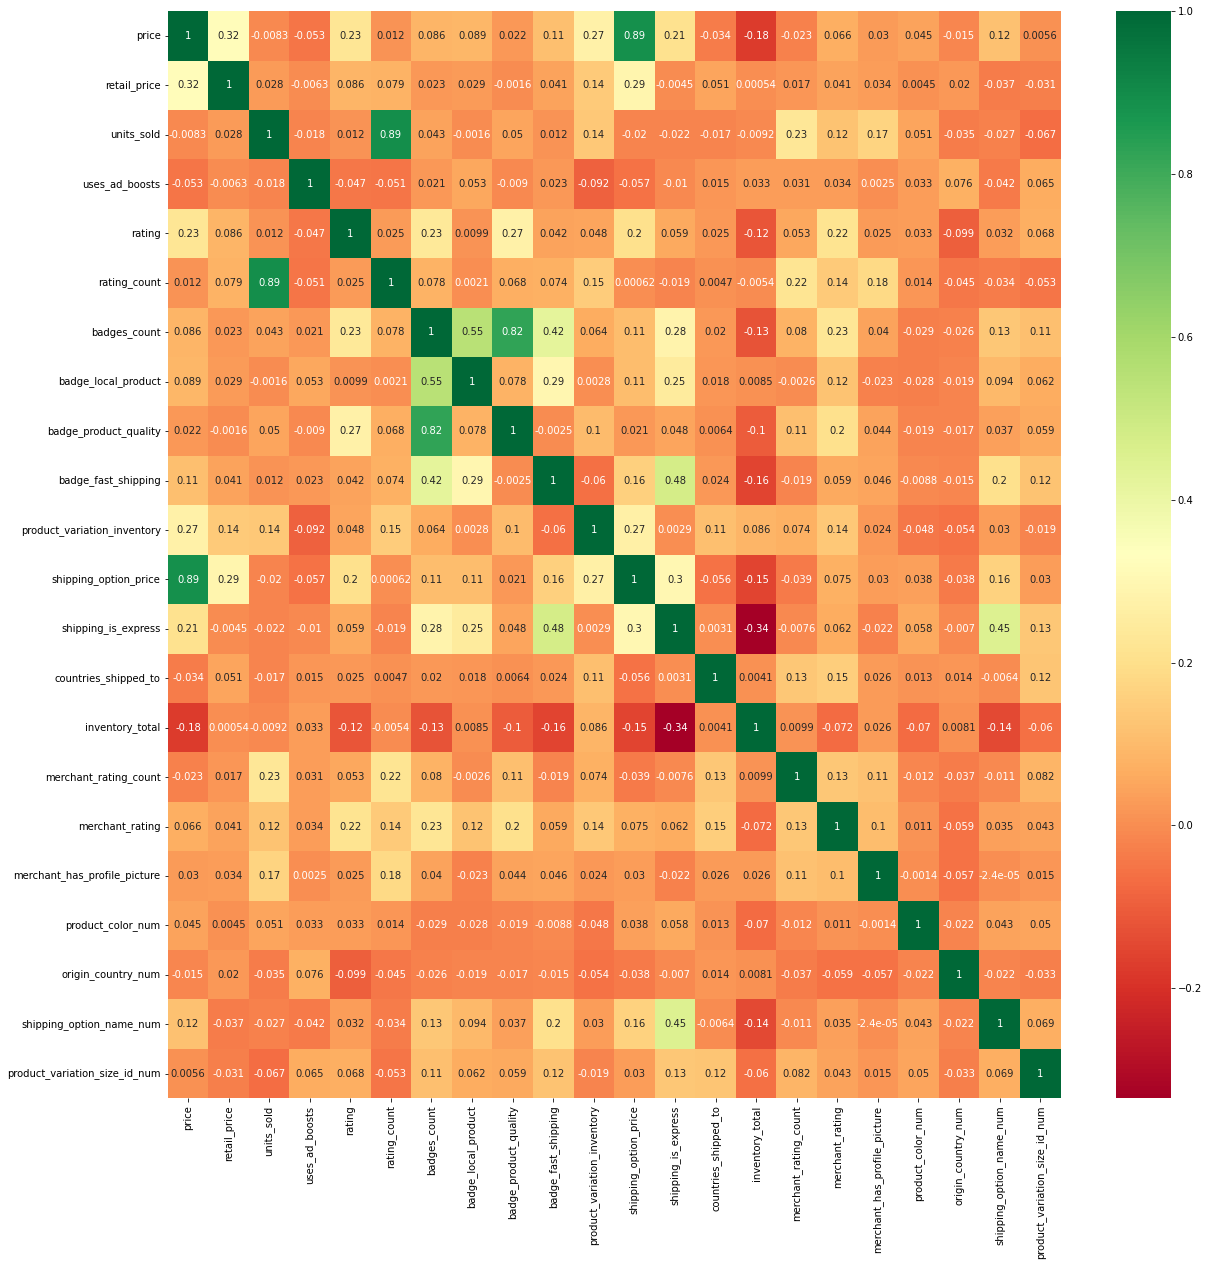

In [35]:
corrmat = data.corr()
top_corr_features = corrmat.index
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [36]:
# from correlation insights 

In [37]:
# check for high corr

In [38]:
data['shipping_option_price'].value_counts()

2     417
3     370
1     222
4      49
5      23
6       8
7       4
12      1
Name: shipping_option_price, dtype: int64

In [39]:
# low corr handeling

In [40]:
data.drop('merchant_info_subtitle',axis=1,inplace=True) # low FI

In [41]:
data['theme'].value_counts() #  one category

summer    1094
Name: theme, dtype: int64

In [42]:
data.drop('theme',axis=1,inplace=True)

In [43]:
data.drop('merchant_title',axis=1,inplace=True) #low FI

In [44]:
data.drop('merchant_name',axis=1,inplace=True) #low FI

In [45]:
data['merchant_id'].value_counts()

5acaf29d5ebcfd72403106a8    8
558c2cdc89d53c4005ea2920    7
5533c83986ff95173dc017d0    6
583138b06339b410ab9663ec    6
582833faea77701b456c786a    6
                           ..
5ae5c3cb4215954239aff8b9    1
5864767762a1e84ca30df7c9    1
587f55e57f83404d58fe59fb    1
5ba0fe4673d934503a6cb6ad    1
5b6ec2f2838d931d2fbf7a28    1
Name: merchant_id, Length: 747, dtype: int64

In [46]:
#From result above there are 958 merchant so approximately one for each which would confuse the model
data.drop('merchant_id',axis=1,inplace=True)

In [47]:
data['tags'].value_counts()

Summer,Fashion,Necks,Skirts,Dress,Loose,Women's Fashion,Round neck,beach dress,sleeveless,Beach,Casual,Women                                                                                                                         13
Summer,Sling,Dresses,Dress,V-neck,Casual,Pocket,Women's Fashion,Sleeveless dress,women dress,Floral,sleeveless,Women,loose dress,Pleated,casual dress                                                                                 7
Summer,Leggings,Fashion,high waist,pants,slim,Women's Fashion,trousers,Green,Army,Women                                                                                                                                               6
slimming,wasitcincher,Fashion,waistgirdle,slimmingcorset,Corset,Summer,Waist,waist trainer,Fashion Accessory,Vest,shaperwear,belt                                                                                                     6
Summer,Women Rompers,Plus Size,women long pants,linenjumpsuit,pants,Over

In [48]:
# needs to be vectorized , better be dropped
data.drop('tags',axis=1,inplace=True)

In [49]:
data.head()

,price,retail_price,units_sold,uses_ad_boosts,rating,rating_count,badges_count,badge_local_product,badge_product_quality,badge_fast_shipping,...,shipping_is_express,countries_shipped_to,inventory_total,merchant_rating_count,merchant_rating,merchant_has_profile_picture,product_color_num,origin_country_num,shipping_option_name_num,product_variation_size_id_num
0,8.00,7,10000,1,4.0,1670,0,0,0,0,...,0,30,50,66644,4.137582,1,0,0,0,0
1,8.00,7,1000,0,4.0,843,1,1,0,0,...,0,37,50,25752,4.256873,0,1,0,0,1
2,6.00,34,100,0,4.0,10,0,0,0,0,...,0,41,50,3897,3.928920,0,2,0,0,1
3,4.67,4,100,1,3.0,82,0,0,0,0,...,0,25,50,7497,4.079365,0,3,0,0,2
4,8.00,11,1000,0,4.0,127,0,0,0,0,...,0,15,50,173,4.306358,0,4,0,0,3


In [50]:
data.columns


Index(['price', 'retail_price', 'units_sold', 'uses_ad_boosts', 'rating',
       'rating_count', 'badges_count', 'badge_local_product',
       'badge_product_quality', 'badge_fast_shipping',
       'product_variation_inventory', 'shipping_option_price',
       'shipping_is_express', 'countries_shipped_to', 'inventory_total',
       'merchant_rating_count', 'merchant_rating',
       'merchant_has_profile_picture', 'product_color_num',
       'origin_country_num', 'shipping_option_name_num',
       'product_variation_size_id_num'],
      dtype='object')

splitting data

In [51]:
# we need to convert from float to int in order to deal with values as categories 
# an error raised when it left as float
data['rating'] = data['rating'].astype(int)

In [52]:
X_train = data.drop(['rating'], axis=1)

In [53]:
y_train = data['rating']

a trial to split data into train and valid but
it decreases the accuracy as the data samples number is already too small

In [54]:
#X_train_new, x_valid, y_train_new, y_valid = train_test_split(X_train, y_train , test_size = 0.1, random_state=3)

In [55]:
#X_train_new.shape

In [56]:
#x_valid.shape

Data Imbalance

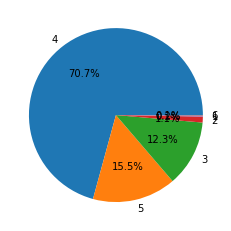

In [220]:
b = data['rating'].value_counts()
b.plot.pie( ylabel='', autopct='%1.1f%%');

In [58]:
# i have tried to drop one instance which represent a whole class but it didn't affect the accuracy
# so i cancelled it 

#data.drop(data[data['rating'] == 6].index, inplace = True)

In [59]:
#i have also tried the SMOTE method but it didn't improve the accuracy
#i don't know how but that what happened
#i'm just leaving the comment to clarify the trial

In [60]:
#from imblearn.over_sampling import SMOTE

In [61]:
#sm = SMOTE(random_state=42, k_neighbors=1, sampling_strategy='not majority')

In [62]:
#X_res, y_res = sm.fit_resample(X_train, y_train)

In [63]:
unique_val_ = np.unique(y_train)
unique_val_

array([1, 2, 3, 4, 5, 6])

In [64]:
y_train.shape

(1094,)

In [65]:
y_train.head()

0    4
1    4
2    4
3    3
4    4
Name: rating, dtype: int64

load test data

In [212]:
test = pd.read_csv("/content/gdrive/MyDrive/data_mining/comp_1/test_new_2.csv")

In [91]:
test.shape

(479, 34)

In [213]:
test.drop(['tags','currency_buyer','merchant_name','merchant_title','has_urgency_banner','crawl_month','merchant_profile_picture','merchant_info_subtitle','theme','merchant_id','urgency_text','id'],axis=1,inplace=True)


In [93]:
# check shape compatiblity with that the model being trained on
test.shape

(479, 22)

In [94]:
data.shape

(1094, 22)

same as done for training data

In [95]:
test['product_color_num'] = pd.factorize(test['product_color'])[0]

In [96]:
test.drop('product_color',axis=1,inplace=True)

In [97]:
test['origin_country_num'] = pd.factorize(test['origin_country'])[0]

In [98]:
test.drop('origin_country',axis=1,inplace=True)

In [99]:
test['shipping_option_name_num'] = pd.factorize(test['shipping_option_name'])[0]

In [100]:
test.drop('shipping_option_name',axis=1,inplace=True)

In [101]:
test['product_variation_size_id_num'] = pd.factorize(test['product_variation_size_id'])[0]

In [102]:
test.drop('product_variation_size_id',axis=1,inplace=True)

In [221]:
X_test = test.drop(['rating'], axis=1)

In [104]:
test['rating'] = test['rating'].astype(int)

In [105]:
y_test = test['rating']

# **Model Selection**

## **(1) Decision Tree**

### (A) Using default parameters



 #### - Training phase

In [106]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.preprocessing import LabelBinarizer
from six import StringIO
from IPython.display import Image
import pydotplus

In [107]:

import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

In [108]:
dtree = DecisionTreeClassifier(random_state=3)

In [109]:
dtree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=3)

In [110]:
y_pred = dtree.predict(X_train)

In [111]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         2
           2       0.86      1.00      0.92        12
           3       0.99      0.99      0.99       135
           4       1.00      1.00      1.00       774
           5       0.99      0.98      0.99       170
           6       1.00      1.00      1.00         1

    accuracy                           0.99      1094
   macro avg       0.97      0.99      0.98      1094
weighted avg       0.99      0.99      0.99      1094



In [112]:
accuracy_score(y_train,y_pred)

0.9926873857404022

#### - Testing phase

In [113]:
y_hat = dtree.predict(X_test)

In [114]:
print(confusion_matrix(y_test, y_hat))

[[  0   0   0   0   0   0]
 [  0   0   0   0   0   0]
 [  0   0   0   0   0   0]
 [  1   3  78 331  65   1]
 [  0   0   0   0   0   0]
 [  0   0   0   0   0   0]]


In [115]:
print(classification_report(y_test, y_hat))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0
           4       1.00      0.69      0.82       479
           5       0.00      0.00      0.00         0
           6       0.00      0.00      0.00         0

    accuracy                           0.69       479
   macro avg       0.17      0.12      0.14       479
weighted avg       1.00      0.69      0.82       479



In [116]:
f1_score(y_test,y_hat,average='micro') 

0.6910229645093946

In [117]:
# 99 on training and 69 on test means overfitting

### (B) First Hyperparameter tunning

In [118]:
dtree = DecisionTreeClassifier(max_depth=2,criterion = "gini",random_state=3)

In [119]:
dtree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=3)

In [120]:
y_pred = dtree.predict(X_train)

In [121]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         2
           2       0.00      0.00      0.00        12
           3       0.00      0.00      0.00       135
           4       0.79      0.94      0.86       774
           5       0.58      0.60      0.59       170
           6       0.00      0.00      0.00         1

    accuracy                           0.76      1094
   macro avg       0.23      0.26      0.24      1094
weighted avg       0.65      0.76      0.70      1094



In [122]:
accuracy_score(y_train,y_pred)

0.7568555758683729

#### - Testing phase

In [123]:
y_hat = dtree.predict(X_test)

In [124]:
print(confusion_matrix(y_test, y_hat))

[[419  60]
 [  0   0]]


In [125]:
print(classification_report(y_test, y_hat))

              precision    recall  f1-score   support

           4       1.00      0.87      0.93       479
           5       0.00      0.00      0.00         0

    accuracy                           0.87       479
   macro avg       0.50      0.44      0.47       479
weighted avg       1.00      0.87      0.93       479



In [126]:
f1_score(y_test,y_hat,average='micro') 

0.8747390396659708

In [127]:
# training decreased but it is better because variance decreased also

### (C) Second Hyperparameter tunning

In [229]:
dtree = DecisionTreeClassifier(max_depth=6,criterion = "entropy",random_state=3)

In [230]:
dtree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=6, random_state=3)

In [231]:
y_pred = dtree.predict(X_train)

In [131]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         2
           2       0.82      0.75      0.78        12
           3       0.54      0.44      0.49       135
           4       0.85      0.94      0.89       774
           5       0.87      0.57      0.69       170
           6       0.00      0.00      0.00         1

    accuracy                           0.82      1094
   macro avg       0.68      0.62      0.64      1094
weighted avg       0.81      0.82      0.81      1094



In [132]:
accuracy_score(y_train,y_pred)

0.8171846435100548

#### - Testing phase

In [133]:
y_hat = dtree.predict(X_test)

In [134]:
print(confusion_matrix(y_test, y_hat))

[[  0   0   0   0]
 [  0   0   0   0]
 [  2  51 395  31]
 [  0   0   0   0]]


In [135]:
print(classification_report(y_test, y_hat))

              precision    recall  f1-score   support

           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0
           4       1.00      0.82      0.90       479
           5       0.00      0.00      0.00         0

    accuracy                           0.82       479
   macro avg       0.25      0.21      0.23       479
weighted avg       1.00      0.82      0.90       479



In [136]:
f1_score(y_test,y_hat,average='micro') 

0.824634655532359

In [ ]:
#0.82 on train, 0.82 on test => best till now , resonable 

### (D) Tunning Using Grid Search

In [137]:
dtreeparam_grid = {
    'max_depth': np.arange(1,15),
    'max_features': np.arange(1,15),
    'random_state': [3]
}
dtree_search = GridSearchCV(dtree, param_grid = dtreeparam_grid, refit = True, verbose = 1, cv=7)
dtree_search.fit(X_train , y_train)

paralist = []
paralist = list(dtree_search.best_params_.values())

dtree = DecisionTreeClassifier(criterion = "entropy", max_depth= paralist[0], max_features =paralist[1], random_state=3)
dtree.fit(X_train, y_train)

Fitting 7 folds for each of 196 candidates, totalling 1372 fits


DecisionTreeClassifier(criterion='entropy', max_depth=6, max_features=12,
                       random_state=3)

In [138]:
y_pred = dtree.predict(X_train)

In [139]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         2
           2       0.71      0.83      0.77        12
           3       0.96      0.19      0.31       135
           4       0.82      0.98      0.89       774
           5       0.85      0.62      0.71       170
           6       0.00      0.00      0.00         1

    accuracy                           0.82      1094
   macro avg       0.72      0.60      0.61      1094
weighted avg       0.84      0.82      0.79      1094



In [140]:
accuracy_score(y_train,y_pred)

0.823583180987203

#### Testing after tunning

In [141]:
y_hat_tunned = dtree.predict(X_test)
print(confusion_matrix(y_test, y_hat_tunned))

[[  0   0   0   0]
 [  0   0   0   0]
 [  4  12 418  45]
 [  0   0   0   0]]


In [142]:
print(classification_report(y_test, y_hat_tunned))

              precision    recall  f1-score   support

           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0
           4       1.00      0.87      0.93       479
           5       0.00      0.00      0.00         0

    accuracy                           0.87       479
   macro avg       0.25      0.22      0.23       479
weighted avg       1.00      0.87      0.93       479



In [ ]:
#0.82 on train, 0.87 on test => tends to underfit again

### (E) Using ExtraTreesClassifier for estimating Feature Importance

by the way , since we are using DT why not to use the extra classifier !!! and try to train on selected feature again

[0.08384736 0.0788117  0.07972691 0.02955183 0.10922699 0.01931735
 0.00463179 0.03226271 0.00394306 0.05301141 0.05028979 0.00158119
 0.08241556 0.00330515 0.08060096 0.10868436 0.0174699  0.07354676
 0.0084085  0.01537582 0.06399091]


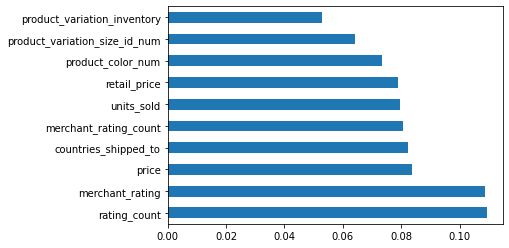

In [144]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X_train,y_train)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X_train.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

now i've known most important so i will drop the rest and try again

dropping first for train

In [145]:
data.drop(['origin_country_num','uses_ad_boosts','badges_count','badge_local_product','badge_fast_shipping','origin_country_num','product_variation_inventory','shipping_is_express','inventory_total','shipping_option_price','merchant_has_profile_picture','shipping_option_name_num','badge_product_quality'],axis=1,inplace=True)


dropping  for test to ensure having compatible size of data

In [146]:
test.drop(['origin_country_num','uses_ad_boosts','badges_count','badge_local_product','badge_fast_shipping','origin_country_num','product_variation_inventory','shipping_is_express','inventory_total','shipping_option_price','merchant_has_profile_picture','shipping_option_name_num','badge_product_quality'],axis=1,inplace=True)


In [147]:
test.shape

(479, 10)

In [148]:
X_train.shape

(1094, 21)

### after feature selection

-- prediction for training

In [149]:
y_pred = dtree.predict(X_train)

In [150]:
print(confusion_matrix(y_train, y_pred))

[[  2   0   0   0   0   0]
 [  0  10   0   2   0   0]
 [  0   3  25 103   4   0]
 [  0   0   1 759  14   0]
 [  0   1   0  64 105   0]
 [  0   0   0   0   1   0]]


In [151]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         2
           2       0.71      0.83      0.77        12
           3       0.96      0.19      0.31       135
           4       0.82      0.98      0.89       774
           5       0.85      0.62      0.71       170
           6       0.00      0.00      0.00         1

    accuracy                           0.82      1094
   macro avg       0.72      0.60      0.61      1094
weighted avg       0.84      0.82      0.79      1094



In [152]:
f1_score(y_train, y_pred,average='micro') 

0.823583180987203

-- for testing

In [153]:
y_hat = dtree.predict(X_test)

In [154]:
print(classification_report(y_test, y_hat))

              precision    recall  f1-score   support

           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0
           4       1.00      0.87      0.93       479
           5       0.00      0.00      0.00         0

    accuracy                           0.87       479
   macro avg       0.25      0.22      0.23       479
weighted avg       1.00      0.87      0.93       479



In [155]:
f1_score(y_test, y_hat, average='micro')

0.872651356993737

In [ ]:
#0.82 on train, 0.87 on test => also tends to underfit again
# i think this is because low no. of samples
# so it is better not to train on selected

## **(2) SVM**

default parameters

In [156]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, y_train)

SVC()

In [157]:
y_pred = svc.predict(X_train)

In [158]:
print(confusion_matrix(y_train, y_pred))

[[  0   0   0   2   0   0]
 [  0   0   0  12   0   0]
 [  0   0   0 135   0   0]
 [  0   0   0 774   0   0]
 [  0   0   0 169   1   0]
 [  0   0   0   1   0   0]]


In [159]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         2
           2       0.00      0.00      0.00        12
           3       0.00      0.00      0.00       135
           4       0.71      1.00      0.83       774
           5       1.00      0.01      0.01       170
           6       0.00      0.00      0.00         1

    accuracy                           0.71      1094
   macro avg       0.28      0.17      0.14      1094
weighted avg       0.66      0.71      0.59      1094



In [160]:
f1_score(y_train, y_pred,average='micro')

0.7084095063985375

#### - Testing phase

In [161]:
y_hat = svc.predict(X_test)

In [162]:
print(confusion_matrix(y_test, y_hat))

[[479]]


In [163]:
print(classification_report(y_test, y_hat))

              precision    recall  f1-score   support

           4       1.00      1.00      1.00       479

    accuracy                           1.00       479
   macro avg       1.00      1.00      1.00       479
weighted avg       1.00      1.00      1.00       479



In [164]:
f1_score(y_test,y_hat,average='micro') 

1.0

In [ ]:
#0.71 on train, 1.0 on test => undefitting again and again :(

Tunning (A)

In [165]:
svc = SVC(kernel='rbf',degree=5)

In [166]:
svc.fit(X_train, y_train)

SVC(degree=5)

In [167]:
y_pred = svc.predict(X_train)

In [168]:
print(confusion_matrix(y_train, y_pred))

[[  0   0   0   2   0   0]
 [  0   0   0  12   0   0]
 [  0   0   0 135   0   0]
 [  0   0   0 774   0   0]
 [  0   0   0 169   1   0]
 [  0   0   0   1   0   0]]


In [169]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         2
           2       0.00      0.00      0.00        12
           3       0.00      0.00      0.00       135
           4       0.71      1.00      0.83       774
           5       1.00      0.01      0.01       170
           6       0.00      0.00      0.00         1

    accuracy                           0.71      1094
   macro avg       0.28      0.17      0.14      1094
weighted avg       0.66      0.71      0.59      1094



In [170]:
f1_score(y_train, y_pred,average='micro')

0.7084095063985375

In [171]:
y_pred = svc.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[479]]
              precision    recall  f1-score   support

           4       1.00      1.00      1.00       479

    accuracy                           1.00       479
   macro avg       1.00      1.00      1.00       479
weighted avg       1.00      1.00      1.00       479



In [ ]:
# 0.71 on train, 1.00 on test => underfitting

Tunning (B)

In [172]:
svc = SVC(kernel='poly',degree=9)

In [173]:
svc.fit(X_train, y_train)

SVC(degree=9, kernel='poly')

In [174]:
y_pred = svc.predict(X_train)

In [175]:
print(confusion_matrix(y_train, y_pred))

[[  0   0   0   2   0   0]
 [  0   0   0  12   0   0]
 [  0   0   1 134   0   0]
 [  0   0   0 771   3   0]
 [  0   0   0 166   4   0]
 [  0   0   0   1   0   0]]


In [176]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         2
           2       0.00      0.00      0.00        12
           3       1.00      0.01      0.01       135
           4       0.71      1.00      0.83       774
           5       0.57      0.02      0.05       170
           6       0.00      0.00      0.00         1

    accuracy                           0.71      1094
   macro avg       0.38      0.17      0.15      1094
weighted avg       0.71      0.71      0.60      1094



In [177]:
f1_score(y_train, y_pred,average='micro')

0.7093235831809871

In [178]:
y_pred = svc.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[  0   0   0]
 [  1 475   3]
 [  0   0   0]]
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         0
           4       1.00      0.99      1.00       479
           5       0.00      0.00      0.00         0

    accuracy                           0.99       479
   macro avg       0.33      0.33      0.33       479
weighted avg       1.00      0.99      1.00       479



In [ ]:
#worst results everrr

grid search, *by the way i regret to do so :(* 

i stopped running it further (when i rerunned the notebook for other models) because it takes hours with no increase in accuracy

In [179]:
# svcparam_grid = {
#     'kernel': ['poly','rbf','sigmoid'],
#     'degree': np.arange(1,30),
#     'random_state':[3],
#     'C': np.arange(0,2),
#     'gamma':['scale', 'auto']
# }
# svc_search = GridSearchCV(svc, param_grid = svcparam_grid, refit = True, verbose = 1, cv=4)
# svc_search.fit(X_train , y_train)
# svc_search.best_params_

# paralist = []
# paralist = list(svc_search.best_params_.values())

# svc = SVC(C =paralist[0], degree= paralist[1], gamma=paralist[2], kernel = paralist[3], random_state=3)
# svc.fit(X_train, y_train)

In [ ]:
# y_pred = svc.predict(X_train)
# print(confusion_matrix(y_train, y_pred))
# print(classification_report(y_train, y_pred))

In [ ]:
# f1_score(y_train, y_pred,average='micro')

In [ ]:
# y_pred = svc.predict(X_test)
# print(confusion_matrix(y_test, y_pred))
# print(classification_report(y_test, y_pred))

In [ ]:
# f1_score(y_test, y_pred, average='micro')

#### **NAIVE**

In [184]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

In [185]:
y_pred = gnb.predict(X_train)

In [186]:
print(confusion_matrix(y_train, y_pred))

[[  2   0   0   0   0   0]
 [  0  12   0   0   0   0]
 [  0  39  72  18   6   0]
 [  0  62 317 361  34   0]
 [  0  57  42  50  21   0]
 [  0   0   0   0   0   1]]


In [187]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         2
           2       0.07      1.00      0.13        12
           3       0.17      0.53      0.25       135
           4       0.84      0.47      0.60       774
           5       0.34      0.12      0.18       170
           6       1.00      1.00      1.00         1

    accuracy                           0.43      1094
   macro avg       0.57      0.69      0.53      1094
weighted avg       0.67      0.43      0.49      1094



In [188]:
f1_score(y_train, y_pred, average='micro') 

0.4287020109689214

In [189]:
y_pred = gnb.predict(X_test)

In [190]:
print(confusion_matrix(y_test, y_pred))

[[  0   0   0   0]
 [  0   0   0   0]
 [ 75 194 193  17]
 [  0   0   0   0]]


In [191]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0
           4       1.00      0.40      0.57       479
           5       0.00      0.00      0.00         0

    accuracy                           0.40       479
   macro avg       0.25      0.10      0.14       479
weighted avg       1.00      0.40      0.57       479



In [192]:
f1_score(y_test, y_pred, average='micro') 

0.40292275574112735

In [ ]:
#worest than SVM ,high bias & high variance , so bad,i'll never use it for test on kaggle

##Random forest

In [ ]:
# i wanted to just try

In [193]:
from sklearn.ensemble import RandomForestClassifier

In [194]:
clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=2, random_state=0)

In [195]:
predictions = clf.predict(X_test)

In [196]:
predictions = predictions.astype(float)

Grid for Random Forest

In [197]:
clf = RandomForestClassifier(random_state=42)

In [198]:
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

In [199]:
CV_rfc = GridSearchCV(estimator=clf, param_grid=param_grid, cv= 5)

In [200]:
# i've commented  it as it didn't result in high performance
# it takes alot of time so in order to rerun the notebook , iwouldn't try to run it again 

In [201]:
#CV_rfc.fit(X_train, y_train)

In [202]:
#CV_rfc.best_params_

In [203]:
#rfc1=RandomForestClassifier(random_state=42, max_features='auto', n_estimators= 500, max_depth=7, criterion='entropy')

In [204]:
#rfc1.fit(X_train, y_train)

In [205]:
#pred=rfc1.predict(X_train)

In [206]:
#print("Accuracy for Random Forest on CV data: ",accuracy_score(y_train,pred))

In [207]:
#pred2=rfc1.predict(X_test)

In [208]:
#print("Accuracy for Random Forest on CV data: ",accuracy_score(y_test,pred2))

In [209]:
#predictions2 = rfc1.predict(X_test)

#Saving results for best 

In [210]:
best_predictions = dtree.predict(X_test)

In [223]:
# just for check "cause i suffer from perfectionism :)"
Id_test = X_test['id']
Id_test.shape

(479,)

In [224]:
best_predictions.dtype

dtype('float64')

In [225]:
# float conversion

In [226]:
best_predictions = best_predictions.astype(float)

In [227]:
best_predictions.dtype

dtype('float64')

In [228]:
best_p_file = pd.DataFrame({'id': Id_test, 'rating': best_predictions})
best_p_file.to_csv('best_p_file.csv', index=False)

# ===> Finally 
from what i have tried, i found that, the Best one is the **Decision Tree model** that was tunned on third trial which i gave it letter 'C', (**0.82** on train, **0.82** on test => resonable ) , and it was done after finding best parameters wich are ==>  **max_depth=6,criterion = "entropy"** .. it gives both low variance and considerable bias , so i will use it for submission on kaggle

I would now try to see how it classified and what splits it made through following graph

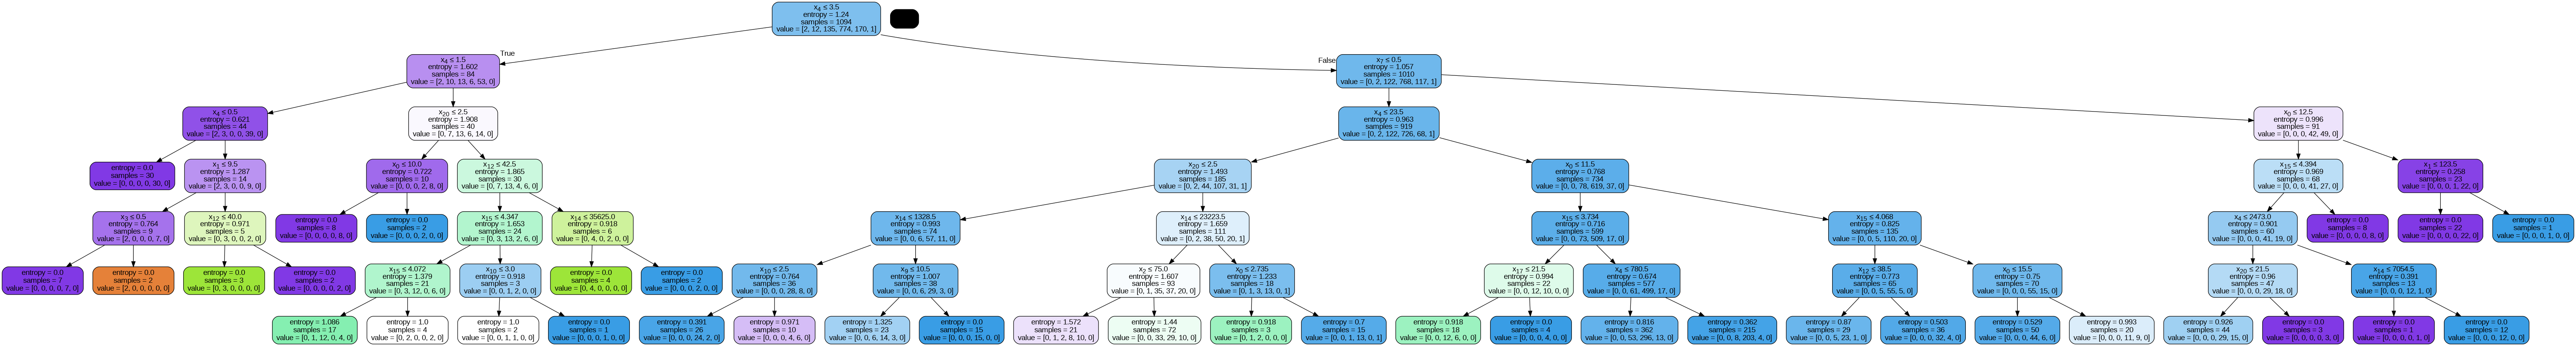

In [232]:
dot_data = StringIO()
export_graphviz(dtree, out_file = dot_data, rounded = True, filled = True, special_characters = True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png("dtree.png")
Image(graph.create_png())

#Answering other questions

**1) Why Data Mining is a misnomer?**


because it doesn't depend only on extracting data from a source, it includes too amny activities such as cleaning, analysis, transformation, integration and could extend more

**2) What is another preferred name?**

Knowledge Discovery is better describes what i have mentioned earlier

**3) What is the general knowledge discovery process?**

1. Data Collection
2. Data preparing(preprocessing)
3. Data Integration
4. Data Transformation
5. Data Mining (pattern extraction)
6. Pattern Evaluation
7. Knowledge Representation
8. Knowledge Utilization





**4) What is the difference between a data engineer and data scientist/AI engineer?**

first i want to mention that it could differ from one company to another , it has no specific outline "specially in some countries like where i currently live(Egypt)" ,but there is still some sort of overlapping between them, so in general,
A data engineer work is more related with software engineering and constraction part and preparing it well for deployment

while data scientist or AI engineer work is more related to dealing with statistics and machine learning to gain insights from data and tune models for  predictions


**5) In data mining, what is the difference between prediction and categorization?**



Prediction means using historical data to make predictions about future,
Categorization is grouping data into categories or classes 



**6) Why data science/machine learning is a bad idea in the context of information security?**





may be dealing with confidential or sensitive data in adiition to being 
prone to bias in the data and models used for analysis. 


**7) What is CIA principle**




a framework for assessing the security and privacy aspects of IS. CIA is abbreviation for Confidentiality, Integrity, and Availability, (the three primary goals of information security.)


**8) how can we use it to access the security/privacy aspect of the AI system/pipelines?**

we can assess it by identify potential vulnerabilities and risks and guide the implementation of appropriate security and privacy measures to mitigate these risks by evaluating how well they protect sensitive information, maintain data accuracy , and ensure the availability.